<a href="https://colab.research.google.com/github/Dopamine-Max/FFN-Milestone-projects/blob/main/Gratuitously_Complicated_Adding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #1 ANN MILESTONE PROJECT

##A Gratuituosly Complicated Adding Machine Through FFN

####Building an FFN that can add two numbers between -10 and 10 and also comparing it to the real result.





In [ ]:
#import libraries

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-174-a78cafaa250e>:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
#create data

N = 5000

#generate data i.e. two random integers
data = torch.randint(-10,11,size=(N,2)).float() #without .float it caused an error in model due to different datatypes
#generate labels i.e. sums
labels = torch.sum(data, dim=1,keepdim=True)
labels

tensor([[ -1.],
        [ 11.],
        [ -4.],
        ...,
        [-11.],
        [ -6.],
        [ -3.]])

In [ ]:
#split the data

#use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)

#convert to Pytorch datasets
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

#convert to dataloaders
batchsize    = 10
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [ ]:
#function that builds the model

def createADDnet():

  #model architecture
  class ADDmodel(nn.Module):
    def __init__(self):
      super().__init__()

      #input layer
      self.input = nn.Linear(2,16)

      #hidden layers
      self.fc1 = nn.Linear(16,32)
      self.fc2 = nn.Linear(32,16)

      #output layer
      self.output = nn.Linear(16,1)

    #forward pass
    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return  self.output(x)

  #declaration as a function
  ADDnet = ADDmodel()

  #loss function
  loss_func = nn.MSELoss()

  #optimizer
  optimizer = torch.optim.Adam(ADDnet.parameters(), lr=.01, weight_decay=.01)

  return ADDnet,loss_func,optimizer

In [ ]:
#test the model
net,lossfun,optimizer = createADDnet()

X,y = next(iter(train_loader))
yHat = net(X)

yHat

tensor([[0.2076],
        [0.2505],
        [0.2559],
        [0.2420],
        [0.2520],
        [0.3780],
        [0.3011],
        [0.1597],
        [0.3767],
        [0.3040]], grad_fn=<AddmmBackward0>)

In [ ]:
#function that trains the model

def trainADDnet():

  #declare epochs and create the model
  epochs = 25
  net,loss_func,optimizer = createADDnet()

  #intialize losses and accuracies
  losses = torch.zeros(epochs)
  trainAcc = []
  testAcc = []

  #loop over epochs
  for epochi in range(epochs):

    #loop over training batches
    batchAcc = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = loss_func(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      #compute accuracy
      batchAcc.append(100*torch.mean((torch.absolute(yHat-y)<1).float()))
    #end of batch loop

    #average training accuracy across batches
    trainAcc.append(np.mean(batchAcc))
    #average loss across batches
    losses[epochi] = np.mean(batchLoss)

    #test computation
    X,y = next(iter(test_loader))
    with torch.no_grad():
      yHat = net(X)

    #compute accuracy for test
    testAcc.append(100*torch.mean((torch.absolute(yHat-y)<1).float()))

  #end of epochs

  return trainAcc,testAcc,losses,net

<function matplotlib.pyplot.show(close=None, block=None)>

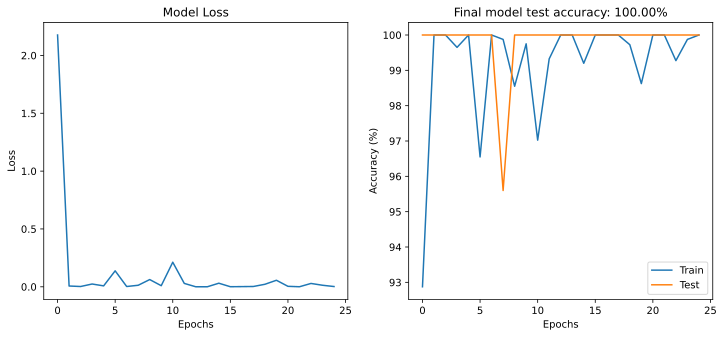

In [ ]:
#Running and plotting results regarding performance

trainAcc,testAcc,losses,net = trainADDnet()

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show

In [ ]:
# run the model 10 times to check reproducibility

for i in range(10):

  # train a new model
  trainAcc,testAcc,losses,net = trainADDnet()

  # report accuracy
  print(f'Model instance {i+1}, Final TRAIN/TEST accuracies: {trainAcc[-1]:.2f}%, {testAcc[-1]:.2f}%')

Model instance 1, Final TRAIN/TEST accuracies: 97.20%, 100.00%
Model instance 2, Final TRAIN/TEST accuracies: 100.00%, 100.00%
Model instance 3, Final TRAIN/TEST accuracies: 99.38%, 100.00%
Model instance 4, Final TRAIN/TEST accuracies: 100.00%, 100.00%
Model instance 5, Final TRAIN/TEST accuracies: 99.53%, 100.00%
Model instance 6, Final TRAIN/TEST accuracies: 99.90%, 100.00%
Model instance 7, Final TRAIN/TEST accuracies: 100.00%, 100.00%
Model instance 8, Final TRAIN/TEST accuracies: 99.57%, 100.00%
Model instance 9, Final TRAIN/TEST accuracies: 100.00%, 100.00%
Model instance 10, Final TRAIN/TEST accuracies: 98.60%, 100.00%


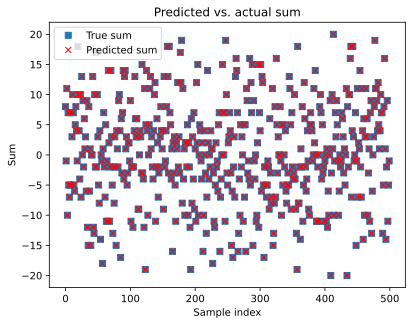

In [ ]:
#plotting the correlation for the model with new data

data = torch.randint(-10,11,size=(500,2)).float() #reduced datasize to be able to see the plot
labels = torch.sum(data, dim=1,keepdim=True)

#evaluate the model
predictions = net(data)
# prediction.detach()

# true and predicted value correlation plot
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()